# Lab Introduction
In this lab we learn some terminology, gain some background of some basic concepts and learn how to use the Scikit-learn library to train different models to perform predictions.

> To keep things simple we will keep the main focus on categorization using supervised learning

## <a id="toc"></a>Table of Contents
 * [Iris Data set](#iris_dataset)
 * [Observations and Features](#observation_features)
 * [Modeling](#modeling)
 * [Train/Test](#train_test)
 * [Model and Parameter Choices](#choices)
 * [Validation set - Hold-out set](#validation)
 * [Hyperparameter Selection](#selection)


# <a id="iris_dataset"></a>Iris Data set
For this lab we will use the famous iris data set. This data set is probably the best known database to be found in pattern recognition literature. The data set contains 3 classes with 50 instances each, and each class refers to a type of iris plant. This data set is generally included in most of the libraries as a sample. However you could download it from https://archive.ics.uci.edu/ml/datasets/iris

> __Tip:__ This link, like many others on the internet, includes a number of other samples that you can use for learning

Our first step is to import the data set, as included within the scikit-learn library

In [1]:
from sklearn.datasets import load_iris

## Load the Iris Data Set
In this step we will load and store the iris data set into a variable.

In [2]:
iris = load_iris()

## Examine `iris` data type
Now that we have loaded the iris data set in variable called `iris`, let's see what type it is

In [3]:
type(iris)

sklearn.utils.Bunch

### Variable details
We can see that it is of type `sklearn.utils.Bunch`

Our expectation would have been to see a list or maybe a list of lists. So let's examine the type and see what this type offers.

__Q:__ _But how do we know what attributes or functions are offered by `iris`?_

The simple answer is to use the online scikit-learn documentation (Bunch objects are just a way to package some numpy arrays) [more info](http://scikit-learn.org/stable/faq.html#how-can-i-create-a-bunch-object), but there is a quicker way to get an initial idea.

> __Tip:__ use the completion feature in Jupyter notebooks by pressing the `tab` key combination

Let's examine the attributes and function offered by iris variable using the completion feature. This helps us learn that we have `iris.feature_names`, `iris.data`, `iris.target_names` and `iris.target`

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Attributes of `iris`
Let's further look into the details of the values we find in the `iris`

Let's check the lengths of the attributes

In [8]:
len(iris.feature_names)

4

In [9]:
len(iris.data)

150

In [10]:
len(iris.target_names)

3

In [11]:
len(iris.target)

150

__Q:__ _Think about what are all these values good for and why are they different sizes?_

> __Tip:__ you can use the slice notation `[a:b]` to see slices of the values in a list

In [12]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

### numpy
One of the data types commonly used is numpy.

In [13]:
type(iris.data)

numpy.ndarray

As we can see above the `iris.data` attribute is of type `numpy.ndarray`, which offers many benefits over simple lists available in python, and they are used quite frequently

A good place to learn about _numpy_ is https://docs.scipy.org/doc/numpy-1.13.0/user/quickstart.html

# <a id="observation_features"></a>Observations and Features

Now that we have examined our dataset a little bit, let's dig into some terminology

- __Observations__ are the individual data samples, or records
- __Features__ are the each of the attributes in the data that are specifically selected, perhaps from a large set of possible attributes that are important to our analysis and modeling

So in other words, if you imagine your data as a table, the rows in the table are the _observations_, while the columns are the _features_.

## Observations and Features in Iris data set
How do we determine what the _iris_ data set looks like?

Recall from examining the iris dataset (i.e. `iris`) that `iris.feature_names` has a length of _4_, and `irsi.data` has a length of 150

This tells us that we have 150 __observations__ and 4 __features__

You might ask how can we infer this from the data itself? We could use the `shape` attribute of the `iris.data` attribute

In [14]:
iris.data.shape

(150, 4)

So this tells us that we have 150 rows (observations) with 4 columns (features) per row

> __Note:__ the fact that we have 4 features may not mean that all of them are always important, you might have data that has 10 features, and during your analysis and modeling, you would use certain combinations of features to better gain insight

## Labeled training data
When talking about a categorization problem in the context of _supervised learning_, we need to have _labeled data_

In this `iris` data set the labeled data is available in the _target_ attribute You can think of each row of the data in the `iris.target` attribute as the response to the categorization question of each observation in the `iris.data`. Put differently, the correct response to the question of _which category does `iris.data[0]` belong to?_ is `iris.target[0]`

> __Q:__ _From the above explanation, and knowing the shape of the input (i.e. `iris.data`) that we saw earlier, what would you expect the shape of the `iris.target` to be?_

In [15]:
iris.target.shape

(150,)

You would expect that the number of observations in the `iris.data` to match the number of rows of data in the `iris.target` attribute.

### Iris target - Numeric
You can also notice that all the values in `iris.target` attribute are numeric. This is because all the analysis and modeling is based on mathematical calculations and the results have to be numeric. However to make things more meaningful for representation, the `iris.target_name` has the textual representation of the numbers (e.g. 0, 1, 2 in  this case)


In [16]:
print([iris.target_names[i] for i in iris.target])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

# <a id="modeling"></a>Modeling
Now that we know what our data looks like, let's use scikit-learn to train a model and make predictions.

The nice thing about scikit-learn is that it follows a simple set of steps in a consistent fashion across any of the available models. This makes learning somewhat easier, and you can use the learning from one library and get started on other libraries much faster.

__First some conventions__
- Upper case is used to represent a list of lists
- Lower case is for simple lists (e.g. vector)

Let's use X to signify the input and y the response.

> __Q:__ _What do you think the X and y should be for our iris example_

In [17]:
X = iris.data
y = iris.target

Now let's use a model, train it, and try a simple prediction. We are doing this just so that we learn the pattern.

For this example we will use the __K-Nearest Neighbors__ classifier algorithm, so let's first import it

In [18]:
from sklearn.neighbors import KNeighborsClassifier

There are quite a few arguments available when trying to instantiate this class, but luckily scikit-learn has some sensible defaults to help you get started faster

In this case we will use `n_neighbors=1` rather than the default value which is 5

> __Q:__ *How do we know the default is 5?* (_hint:_ content assist)

By the way, these tuning parameters are sometimes also referred to as __hyper parameters__, and they make a considerable impact on the model's behavior and prediction accuracy

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

so now that we have an instance of this classifier, let's use it to train the model

In [20]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

our model instance is trained with all of the iris dataset

Let's try doing a prediction

In [21]:
print(iris.data[5], iris.target[5])
print(iris.data[100], iris.target[100])

(array([ 5.4,  3.9,  1.7,  0.4]), 0)
(array([ 6.3,  3.3,  6. ,  2.5]), 2)


In [22]:
X1 = [[5.4,  3.9,  1.7,  0.4]]
knn.predict(X1)

array([0])

> __Q:__ *why does the X1 test data above have two brackets?*
  _hint:_ remember the shape of our input data

Let's try another test data

In [23]:
X2 = [[5.4,  3.9,  1.7,  0.4], [6.3,  3.3,  6. ,  2.5]]
knn.predict(X2)

array([0, 2])

Let's repeat the same steps with a different parameter

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.predict(X1)

array([0])

In [25]:
knn.predict(X2)

array([0, 2])

What if we decided to use a different model?

Let's use a __Logistic Regression__ model

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict(X2)

array([0, 2])

> __Note:__ If we had an accuracy of 100% it doesn't mean that our model is perfect, it most likely means we have __overfit__ our model, and it will do a great job of predicting values it has already been given, but will not do well on unseen data

# <a id="train_test"></a>Train/Test

So far we have explored how to work with Scikit-learn and a couple of its modeling algorithms.

Let's look at a better way of training our model. Training a model requires large amounts of data, however validating that the model worked also needs a reasonable set. The general practice is to split the labeled data into a _Training_ and a _Test_ set. You would use the training set to train the model, and then use the test set (which is distinct and separate from the training set) to see how well the trained model is doing.

One simple way to achieve this is to take the entire data set, and set aside 30% of the entries with a random selection. So the model is trained with 70% of the data, and then its tested with the remaining 30% test set, which the model hasn't seen before.

It might be easy to write a couple of lines of code to do this, but you would be doing this every time. Scikit-learn provides a simple way to randomly split your data set into training and test set.

Let's use this approach and perform a training and then test the model

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In the above snippet, we imported `train_test_split`, and used it to split the iris data set into two pairs of training and test set data. We will use the `X_train` training set with its corresponding `y_train` response, and when we are ready to test our model (after training), we will use the `X_test` test data set with its corresponding response data `y_test`

Let's briefly explore the shapes of the data we just split

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(97, 4)
(97,)
(53, 4)
(53,)


> __Note:__ Why 97 and 53? 150 * .35 = 52.5 or rounded to 53

Now let's use the data and perform the training and testing activities

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we have trained the model with the training data, let's see the prediction results from the test data

In [30]:
y_pred = logreg.predict(X_test)

So the above predictions are generated by the model, and we will have to compare it with the correct values from our data set as stored in the `y_test` data

In [31]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.943396226415


As you can see, we are achieving a 94% accuracy

Let's try this with KNN (like we did earlier) with a K=5 values

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.981132075472


In this case we achieved an accuracy of 98%

> __Q:__ *How can we determine the most suitable K value*

A simple way that comes to mind is to repeat the above steps in a loop and change the K value, and then check the accuracy

In [33]:
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("K=%d\t=> %f" %(k, metrics.accuracy_score(y_test, y_pred)))

K=1	=> 0.981132
K=2	=> 0.962264
K=3	=> 0.981132
K=4	=> 0.981132
K=5	=> 0.981132
K=6	=> 0.981132
K=7	=> 0.962264
K=8	=> 0.943396
K=9	=> 0.962264
K=10	=> 0.962264
K=11	=> 0.962264
K=12	=> 0.981132
K=13	=> 0.962264
K=14	=> 0.962264
K=15	=> 0.962264
K=16	=> 0.962264
K=17	=> 0.962264
K=18	=> 0.962264
K=19	=> 0.962264
K=20	=> 0.962264
K=21	=> 0.962264
K=22	=> 0.943396
K=23	=> 0.962264
K=24	=> 0.943396
K=25	=> 0.943396


From the values above we can see that __K=12__ has includes the best results while including larger number of neighbors. What we need to do next is to use this value of K, and train our model with the __entire training data__ that we have (i.e. `X` and _not_ just `X_train`), and then start using it with unseen data and gauge its performance.

In [34]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
knn.predict(X1)

array([0])

# <a id="choices"></a>Model and Parameter Choices
So far we looked at two ways of training our data
- Using the entire data set for training and then testing with the same data
- Splitting the data into a training set and a testing set

In the first case we have no way of knowing how well each model and its various parameters would do outside of our own known data set. So this is not effective
However in the second case, we at least get some idea how well the model would be doing because we have a testing set, which would help us in model and parameter decision making.

The second approach is a step in the right direction. Imagine if we had a way to generate multiple splits of the data set into training and testing data sets to give us the advantage of training the data with a variety of record mixes; and averaged out the accuracy of the model across these variations. It also enables a more efficient use of the data set. This is essentially what __K Fold Cross Validation__ offers!

> Note: this is a more time consuming method compared to train/test split, because you would be running the training sessions K times compared to single time with train/test split.

## Cross Validation
The following image shows how this works
![cross validation](images/CrossValidation.png)

In Scikit-learn this is offered by the `cross_val_score` class. In this example we will use `K=5` for the _KNN_ model and perform a 10-fold cross validation

In [35]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


Now we can use the average score as an indicator of how well our model will do when run on unseen data

In [36]:
print(scores.mean())

0.966666666667


Now that we have a more effective (albeit slower) way of using our data, we can also find the best `K` value for our _KNN_ model

In [37]:
kRange = range(1, 31)
scoresByK = []
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    scoresByK.append((scores.mean()))
    print("K=%d\t=> %f" %(k, scores.mean()))

K=1	=> 0.960000
K=2	=> 0.953333
K=3	=> 0.966667
K=4	=> 0.966667
K=5	=> 0.966667
K=6	=> 0.966667
K=7	=> 0.966667
K=8	=> 0.966667
K=9	=> 0.973333
K=10	=> 0.966667
K=11	=> 0.966667
K=12	=> 0.973333
K=13	=> 0.980000
K=14	=> 0.973333
K=15	=> 0.973333
K=16	=> 0.973333
K=17	=> 0.973333
K=18	=> 0.980000
K=19	=> 0.973333
K=20	=> 0.980000
K=21	=> 0.966667
K=22	=> 0.966667
K=23	=> 0.973333
K=24	=> 0.960000
K=25	=> 0.966667
K=26	=> 0.960000
K=27	=> 0.966667
K=28	=> 0.953333
K=29	=> 0.953333
K=30	=> 0.953333


Let's plot these values to see a visual representation of this data

The X-axis represents the `K` values for _KNN_

The Y-axis represents the _Cross Validation Accuracy_

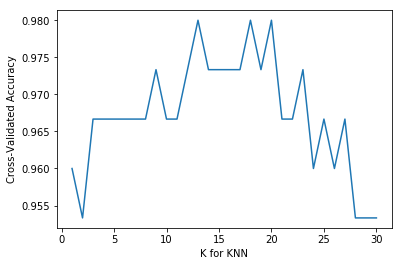

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(kRange, scoresByK)
plt.xlabel('K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Let's compare the _KNN_ and _Logistic Regression_ model results using _cross validation_ and find the best between the two

In [39]:
knn = KNeighborsClassifier(n_neighbors=20)
print("KNN accuracy\t= %f" %cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

logreg = LogisticRegression()
print("LogReg accuracy\t= %f" %cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

KNN accuracy	= 0.980000
LogReg accuracy	= 0.953333


# <a id="validation"></a>Validation set - Hold-out set
You can set some data aside in the beginning to use at the end of train/test or cross-validation training. This data is truly out of sample and can be a good indicator of how well the model is doing.

## <a id="selection"></a>Hyperparameter Selection
So far we compared the performance of single models, or explored changing a single hyperparameter value. It appears that to get the best combination of _hyperparameters_ for, any model, would mean writing some code. The code would iterate over a permutation of different options. Let's say param_1 can be _1_ or _2_, and param_2 can be _a_ or _b_, then you would have to write code to test the model with these combinations of param_1 and param_2 respectively
- _1 & a_
- _1 & b_
- _2 & a_
- _2 & b_

And imagine changing that code every time you need to add more parameters or change them!

Scikit-learn offers a simple solution to this: __GridSearchCV__

`GridSearchCV` simply allows you to define the parameters and their possible values and then apply them to a model in a single line

In [40]:
from sklearn.model_selection import GridSearchCV
kRange = range(1, 30)
param_grid = dict(n_neighbors=kRange)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
gridMeanScores = grid.cv_results_["mean_test_score"]

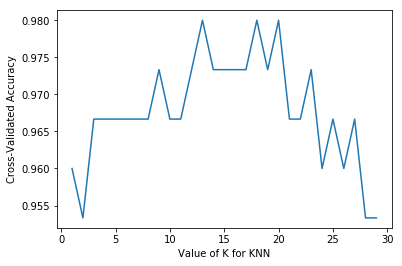

In [41]:
plt.plot(kRange, gridMeanScores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [42]:
print "Best Score = ", grid.best_score_
print "Best Params = ", grid.best_params_
print "Best Estimator = ", grid.best_estimator_

Best Score =  0.98
Best Params =  {'n_neighbors': 13}
Best Estimator =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


The above example used a single parameter, but the same technique can be used to add more options to the parameters. For example we could define `param_grid = dict(n_neighbors=kRange, weights=weightOptions)` where `weightOptions = ['uniform', 'distance']`. This would cause a larger set of tests where each `K` value is paired once with _uniform_ and the _distance_ for the _weights_ parameter.

This method allows a simpler way of working with multiple permutation and combinations of parameter usage.

As you can imagine, a larger number of variations could cause a huge performance concern. The __RandomizedSearchCV__ class offers some relief by randomly selecting combinations, and as you can imagine the tradeoff of faster computation is less accuracy.